<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_dl.png" alt="Drawing" style="width:1700px;">


# <center> **10. A brief and very preliminary introduction to deep learning!** </center>


This guide uses tf.keras, a high-level API to build and train models in TensorFlow.


##  **Outline**
1. **DL: The most simple linear model**
2. **DL: The engineering solution and activation functions**
3. **DL: Training, Back-propagation and gradient descent**
4. **DL: Testing: Forward propagation**

In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

In [2]:
#@title 2. LOAD LIB { display-mode: "form" }
#@markdown Here is important to change to GPU  

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.4.0


# **1. DL: The most simple linear model**


The **most sucesful** thecnique nowadays is based on the most simple classifier: **the linear classifier!**. The basic idea is to split classes by a linear boundary with dimensions according to the features of the problem. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/img0.png"/>


- It is the most simple classifer, from which the predicted value $\hat{y}$ is represented as a **linear combination** of input variables $\mathbf{X} = [x_1, x_2, \ldots, x_n]$, so: 

$$\hat{y}(W, X) = w_0 + x_1 w_1+ x_2 w_2+ \ldots + x_n w_n$$

  - ($x_i$) Inputs: image features, pixels  
  - ($W$) Weights associated to each of the fetures
  - ($\hat{y}$) predictions label. {cat, garfield, car ...} 
     
**How?:** 

- Fit a linear model with coefficients $w = (w_0, \ldots, w_p)$ minimizing the residual sum of squares: 

$$min_{\mathbf{w}} ||\mathbf{X}w -y ||_{2}^{2}$$

**THE PROBLEM NOW IS TO FIND $\mathbf{w}$**

### This linear equation could be represented as a network:


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl1.jpg" >



Why a relationship with **biological neurons**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/singleN.png" >


**Go to the action!**

## **MNIST dataset**

The well know classification: MNIST dataset with 60000 images for training and 10000 for test. Images were taken from American Census Bureau employees and American high school students.

**Note:** This original dataset is much larger than previous one!

In [ ]:
#@title **code** Download original Mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(tf.__version__)

In [22]:
#@title **code** To plot some examples
class_names = ['cero','uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [12]:
#@title **code** To normalize and prepare data
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# **2. DNN: The engineering solution: hidden layers and activation functions**


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ANNs.gif" style="width:400px;">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl2.jpg" style="width:300px;">



## **Main componenets on DNN**

- **input units:**  are raw information as input layer, namely a vectorized version of each sample. For MNIST is a flatten vector of 784 inputs. 
- **Hidden units:** are internal correlation on the network, which do the **magic!**. The input units and previous layers are correllated wit some **learned weights**. 
- **activation functions:** introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.
    - *Softmax*, used in classification tasks, takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one to ensure that the outputs are probabilities. 
    
    
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/actifunc.png" >


- **output units** Give the result on correlation of network units, and namelly is mapped to a **sofmax function** to give a probability of each class. On MNIST sample the output layer should be 10 because we have 10 classes. 

In [24]:
#@title **code** Coding a DNN from Keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# **3. DL: Training, Back-propagation and gradient descent**

For **training** is used a backpropagation strategy, which consist on compute derivatives from end-to-start into the network. The backpropagation is implemented using a thecnique named **Gradient Descent**, which ‘adjust’ all weights in the network with an aim of reducing the error at the output layer.



- **Backpropagation** best trade-off between intuition and formalism [here](http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl3.gif" >


- **Stochastic gradient descent:**  select randomly a sub-set for training  because the high dimensional problem on DNN
- **Epochs** number of times that an **ENTIRE** dataset is passed orward and backward through the DNN
- **Batch size** is the sub-set of training examples to pass into during gradient descent training. For stochastic gradient descent is used the concep of mini-batch

In [ ]:
#@title **code** Training a DNN
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# **4. DL: Testing: Forward propagation**

Once we have trained our DNN, we follow a classical evaluation of a machine learning dataset. In such case we will to evaluate the accuracy:

In [17]:
#@title **code** Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2229 - accuracy: 0.9370
Test accuracy: 0.9369999766349792


see more deeply on predictions

In [26]:
#@title **code** How work predictions?
predictions = model.predict(x_test)
print(predictions[5125])
print("valor predicho:",  np.argmax(predictions[5125]), "max prob: ", np.max(predictions[5125]),
      "ground truth: ", y_test[5125] )

[5.7029534e-05 4.2024274e-07 9.9771750e-01 7.3965239e-05 4.6413490e-08
 7.9228193e-05 4.7313333e-05 7.6198712e-06 1.9878258e-03 2.9079873e-05]
valor predicho: 2 max prob:  0.9977175 ground truth:  2


Now, we can evaluate single examples, even new examples

the number predicted is:  2


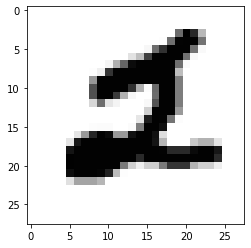

In [19]:
#@title **code** individual predictions
img_rows, img_cols =28, 28
image_index = 5125
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print("the number predicted is: ", pred.argmax())

In [20]:
#@title **code** Performance on predictions
%run code/dl_plot.py
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

In [27]:
#@title **code** Batch of predictions
%run code/dl_plot.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

<Figure size 432x288 with 0 Axes>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


1. Change configuration with two different activation function: tanh, elu
2. Built a deep neural network with:
    - one hidden layer of 512 neurons and relu activation
    - one hidden layers of 128. 
3. Try with a more challenge dataset: for instance: **fashion mnist**



# **References**

[1] Tensorflow: https://www.tensorflow.org/


[2] Playground: http://playground.tensorflow.org/


[3] Udacity deep learning course: https://classroom.udacity.com/courses/ud730

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">